In [569]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [570]:
medical_df = pd.read_csv('insurance.csv')

In [571]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [572]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [573]:
# Метод МНК
X = non_smoker_df.age.values
y = non_smoker_df.charges.values

X_intercept = np.vstack([np.ones(len(X)), X]).T

In [574]:
MNK_coefs = np.linalg.inv(X_intercept.T.dot(X_intercept)).dot(X_intercept.T).dot(y)
MNK_coefs

array([-2091.42055657,   267.24891283])

In [575]:
MNK_predictions = np.dot(X_intercept, MNK_coefs)
MNK_predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289], shape=(1064,))

In [576]:
MNK_rmse = np.sqrt(mean_squared_error(y, MNK_predictions))
MNK_rmse

np.float64(4662.505766636395)

In [577]:
# Градієнтний спуск
def full_batch_gradient_descent(X, y, lr=0.1, epochs=100):
    m, b = 0.0, 0.0
    n = len(y)
    errors = []
    for _ in range(epochs):
        y_pred = m * X[:, 1] + b
        error = y_pred - y
        errors.append(np.sqrt(mean_squared_error(y, y_pred)))
        m_gradient = (2 / n) * np.dot(error, X[:, 1])
        b_gradient = (2 / n) * np.sum(error)
        m = m - lr * m_gradient
        b = b - lr * b_gradient
    return m, b, errors

FBGD_results = {}
epochs = 1000
learning_rates = [0.0001, 0.00001, 0.0005]

for lr in learning_rates:
    m, b, errors = full_batch_gradient_descent(X_intercept, y, lr, epochs)
    FBGD_results[lr] = {'m': m, "b": b, 'errors': errors}

FBGD_result = FBGD_results[min(FBGD_results, key=lambda lr: FBGD_results[lr]['errors'][-1])]
m, b, errors = FBGD_result.values()
m, b

(np.float64(225.10058069010333), np.float64(-219.4581569965845))

In [578]:
FBGD_predictions = b + m * X_intercept[:, 0]
FBGD_predictions

array([5.64242369, 5.64242369, 5.64242369, ..., 5.64242369, 5.64242369,
       5.64242369], shape=(1064,))

In [579]:
FBGD_rmse = np.sqrt(mean_squared_error(y, FBGD_predictions))
FBGD_rmse

np.float64(10340.860221943285)

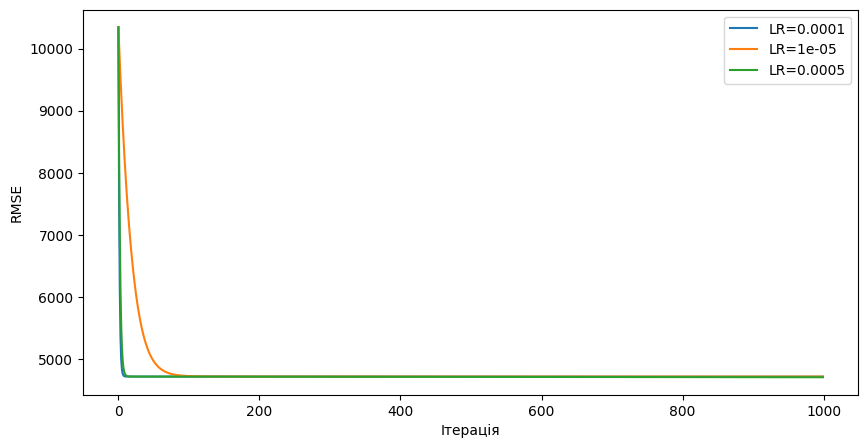

In [580]:
plt.figure(figsize=(10, 5))
for lr, lr_result in FBGD_results.items():
    plt.plot(lr_result['errors'], label=f'LR={lr}')
plt.xlabel('Ітерація')
plt.ylabel('RMSE')
plt.legend()
plt.show()

**Висновок**

Найефективнішим leatning rate - 0.05.

In [581]:
# Scikit-learn
from sklearn.linear_model import LinearRegression

In [582]:
lin_reg = LinearRegression()
lin_reg.fit(X.reshape(-1, 1), y)
lin_reg.coef_, lin_reg.intercept_

(array([267.24891283]), np.float64(-2091.4205565650773))

In [583]:
SKL_predictions = lin_reg.predict(X.reshape(-1, 1))
SKL_predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289], shape=(1064,))

In [584]:
SKL_rmse = np.sqrt(mean_squared_error(y, SKL_predictions))
SKL_rmse

np.float64(4662.505766636395)

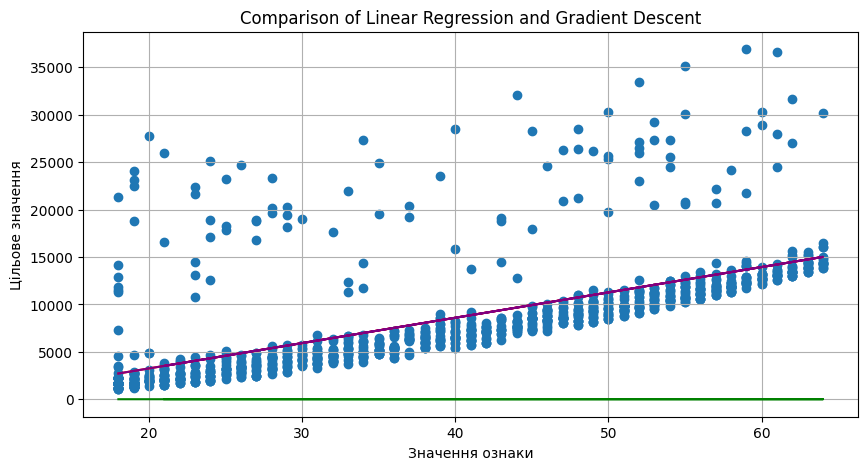

In [585]:
plt.figure(figsize=(10, 5))
plt.scatter(X, y, label='Data points')
plt.plot(X, MNK_predictions, label='MNK', color='red')
plt.plot(X, FBGD_predictions, label="Full-batch Gradient Descent", color="green")
plt.plot(X, SKL_predictions, label="Scikit-learn", color="purple")
plt.title('Comparison of Linear Regression and Gradient Descent')
plt.xlabel('Значення ознаки')
plt.ylabel('Цільове значення')
plt.grid(True)
plt.show()

In [586]:
print('Коефіцієнти з МНК: ', MNK_coefs)
print('Коефіцієнти з Full-batch град. спуску: ', b, m)
print('Коефіцієнти з Scikit-learn: ', lin_reg.intercept_, lin_reg.coef_)

Коефіцієнти з МНК:  [-2091.42055657   267.24891283]
Коефіцієнти з Full-batch град. спуску:  -219.4581569965845 225.10058069010333
Коефіцієнти з Scikit-learn:  -2091.4205565650773 [267.24891283]


In [587]:
print('RMSE МНК: ', MNK_rmse)
print('RMSE Full-batch град. спуску: ', FBGD_rmse)
print('RMSE Scikit-learn: ', SKL_rmse)

RMSE МНК:  4662.505766636395
RMSE Full-batch град. спуску:  10340.860221943285
RMSE Scikit-learn:  4662.505766636395


 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [588]:
smoker_df = medical_df[medical_df.smoker == 'yes']

X = smoker_df.age.values.reshape(-1, 1)
y = smoker_df.charges.values

lin_reg = LinearRegression()

predictions = lin_reg.fit(X, y).predict(X)

r2 = r2_score(y, predictions)
rmse = np.sqrt(mean_squared_error(y, predictions))

r2, rmse

(0.13558924096084068, np.float64(10711.00334810241))

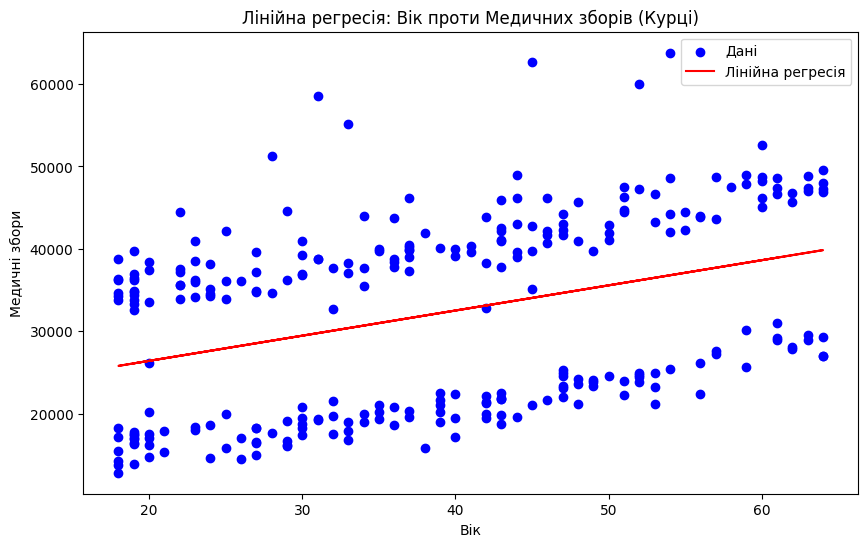

In [589]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label="Дані", color="blue")
plt.plot(X, predictions, label="Лінійна регресія", color="red")
plt.title("Лінійна регресія: Вік проти Медичних зборів (Курці)")
plt.xlabel("Вік")
plt.ylabel("Медичні збори")
plt.legend()
plt.show()

**Висновки**

Модель не є достатньо точною і може вимагати покращення або використання іншого підходу.